In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

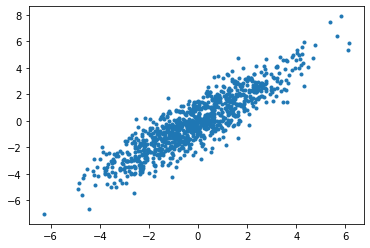

In [2]:
N = 1000
K = 10
X = np.random.normal(size = (N,K))
E = np.random.normal(size = N)
beta = np.linspace(0,1,num=K)

Y = np.matmul(X,beta) + E

plt.plot(np.matmul(X,beta),Y,'.')
plt.show()

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

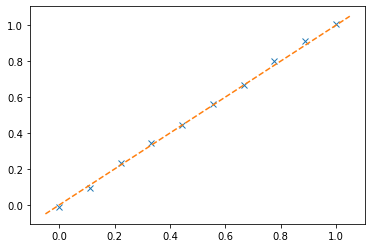

In [3]:
def numpy_ols(Y,X):
    return np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))

beta_hat = numpy_ols(Y,X)
plt.plot(beta,beta_hat,'x')
abline(1,0)
plt.show()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


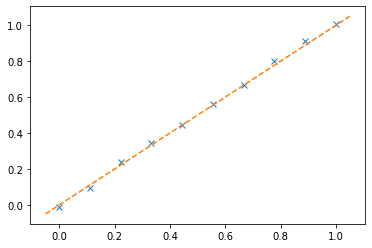

In [4]:
model2 = Sequential()
model2.add(Dense(1, input_dim=K))
model2.summary()
model2.compile(optimizer='sgd', loss='mse')
    
hist = model2.fit(X, Y, epochs=100, batch_size=50, verbose=0)
beta_keras = model2.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)
plt.show()

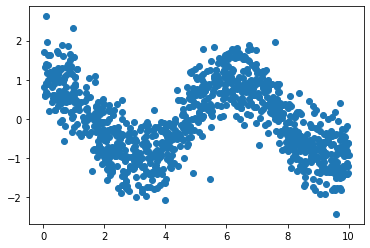

In [5]:
X = 10*np.random.uniform(size = N)
Y = np.cos(X) + 0.5*np.random.normal(size = N)
plt.plot(X,Y,'o')
plt.show()

Model: &quot;sequential_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


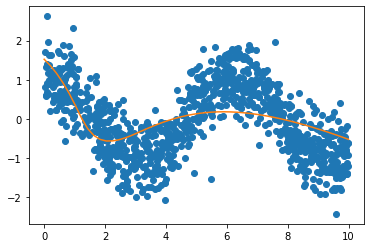

In [6]:
model3 = Sequential()
model3.add(Dense(20, input_shape=(1,)))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.summary()

model3.compile(optimizer='adam', loss='mse')
hist = model3.fit(X, Y, epochs=100, batch_size=20, verbose=0)
Xp = np.linspace(0,10,num=50)
Yp = model3.predict(Xp)
plt.plot(X,Y,'o')
plt.plot(Xp,Yp,'-')
plt.show()

This model has four layers, and can be charachterized as 1-20-1-1.

The first layer takes inputs $x_i$, whose shape is (1,1).

The second layer calculates $a_{ik} = \alpha_{ik} x_{i}$, where $k=1,2,...,20$, $\alpha_{ik}$ are weights, and applies the activation function $b_{ik}=g(a_{ik})$, then outputs $B_{i}$, whose elements are $b_{ik}$. The shape of $B_{i}$ is (1,20).

The third layer takes $b_{ik}$ as inputs, calculates $c_i = \sum^{k=20}_{k=1}\beta_{ik} b_{ik}$, $\beta_{ik}$ are weights, and applies the activation function $d_i=g(c_i)$, then outputs $d_{i}$, whose shape is (1,1).

The fourth layer takes $d_{i}$ as inputs, calculates $\hat{y}_i=\omega_id_i$, $\omega_{i}$ are weights, and without applying the activation function, then outputs $\hat{y}_{i}$, whose shape is (1,1).

Model: &quot;sequential_2&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


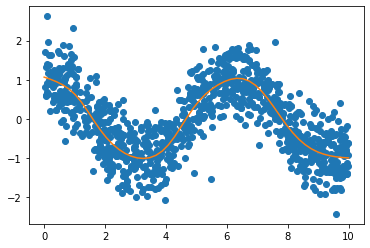

In [7]:
model3 = Sequential()
model3.add(Dense(50, input_shape=(1,)))
model3.add(Activation('tanh'))
model3.add(Dense(10))
model3.add(Activation('tanh'))
model3.add(Dense(1))
model3.summary()

model3.compile(optimizer='adam', loss='mse')
hist = model3.fit(X, Y, epochs=2000, batch_size=500, verbose=0)
Xp = np.linspace(0,10,num=50)
Yp = model3.predict(Xp)
plt.plot(X,Y,'o')
plt.plot(Xp,Yp,'-')
plt.show()